## Latar Belakang
AWS merupakan perusahaan yang bergerak di bidang penjualan layanan perangkat lunak berbasis langganan (SaaS) dan memiliki jangkauan pasar yang luas mencakup berbagai segmen dan wilayah. Dalam menjalankan kegiatan operasionalnya, AWS menerapkan berbagai strategi pemasaran dan penjualan untuk mencapai target bisnisnya.

Namun, dari data penjualan historis yang tersedia, ditemukan bahwa tidak semua transaksi memberikan keuntungan. Terdapat sejumlah transaksi yang justru menghasilkan profit negatif, yang berpotensi mengurangi total profitabilitas perusahaan. Meskipun tidak mendominasi secara jumlah, transaksi-transaksi ini dapat berdampak signifikan terhadap margin keuntungan secara keseluruhan.

Situasi ini menimbulkan pertanyaan penting: Apa yang menjadi penyebab kerugian tersebut? Apakah kerugian hanya terjadi pada produk tertentu, segmen pelanggan tertentu, atau wilayah tertentu? Dan apakah ada pola yang konsisten dalam transaksi-transaksi yang merugi tersebut?

## Pernyataan Masalah
Perusahaan AWS menghadapi kondisi di mana sebagian transaksi yang terjadi justru menghasilkan kerugian. Untuk itu, diperlukan analisis menyeluruh untuk memahami penyebab dan karakteristik dari transaksi-transaksi tersebut. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Faktor-faktor apa saja yang menyebabkan terjadinya transaksi dengan profit negatif di perusahaan AWS, serta bagaimana pola kerugian tersebut muncul berdasarkan karakteristik data yang tersedia?**

Melalui analisis ini, diharapkan diperoleh pemahaman mendalam mengenai penyebab kerugian, sehingga dapat menjadi dasar bagi pengambilan keputusan strategis untuk meningkatkan profitabilitas perusahaan ke depannya.



## Data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Dataset ini memuat informasi transaksi dari sebuah perusahaan SaaS fiktif yang menyediakan perangkat lunak untuk penjualan dan pemasaran kepada bisnis lain (B2B). Setiap baris dalam dataset merepresentasikan satu produk dalam suatu transaksi, dan kolom-kolomnya meliputi:

- Row ID = ID unik untuk setiap transaksi.
- Order ID = ID unik untuk setiap pesanan.
- Order Date = Tanggal saat pesanan dilakukan.
- Date Key = Format numerik dari tanggal pesanan (YYYYMMDD).
- Contact Name = Nama orang yang melakukan pemesanan.
- Country = Negara tempat pesanan dilakukan.
- City = Kota tempat pesanan dilakukan.
- Region = Wilayah tempat pesanan dilakukan.
- Subregion = Subwilayah dari lokasi pesanan.
- Customer = Nama perusahaan yang melakukan pemesanan.
- Customer ID = ID unik untuk setiap pelanggan.
- Industry = Industri tempat pelanggan berasal.
- Segment = Kategori segmen pelanggan (seperti SMB, Strategic, Enterprise, dll.).
- Product = Produk yang dipesan.
- License = Kunci lisensi dari produk.
- Sales = Total nilai penjualan dari transaksi.
- Quantity = Jumlah unit produk dalam transaksi.
- Discount = Potongan harga yang diberikan pada transaksi.
- Profit = Keuntungan yang dihasilkan dari transaksi.

Berikut 5 baris dari atas dari dataset SaaS:

In [41]:
df=pd.read_csv('SaaS-Sales.csv')
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## Data Understanding and Cleaning
Tahap ini bertujuan untuk memahami struktur dan kualitas data, serta melakukan pembersihan seperti menghapus duplikasi, menangani missing values, dan standarisasi format agar data siap untuk dianalisis.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [43]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


Berdasarkan hasil statistik deskriptif, dataset terdiri dari **9.994 data**. Rata-rata nilai penjualan (Sales) sebesar 229,86 dengan deviasi standar yang cukup tinggi, yaitu 623,45, menunjukkan adanya variasi besar antar transaksi. Nilai diskon rata-rata sebesar 15,6%, dengan rentang diskon dari 0% hingga 80%. Profit memiliki distribusi yang cukup lebar, mulai dari kerugian sebesar -6.599,98 hingga keuntungan sebesar 8.399,98, dengan rata-rata profit positif sebesar 28,66.

In [44]:
df.drop('Row ID', axis=1, inplace=True)
df.head(5)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Kolom ``Row ID`` dihapus karena hanya berfungsi sebagai penomoran tambahan yang sebenarnya sudah diwakili oleh index bawaan DataFrame. Adanya dua nomor urut membuat data terlihat tidak rapi dan bisa membingungkan. Karena kolom ini tidak menambah informasi penting untuk analisis, maka dihapus untuk menyederhanakan struktur data.

In [45]:
duplicated = df.duplicated().sum()
print(f"Duplicated rows: {duplicated}")

Duplicated rows: 0


Pengecekan terhadap data duplikat dilakukan menggunakan fungsi ``duplicated()``. Hasilnya menunjukkan bahwa tidak terdapat baris duplikat di dalam dataset (jumlah duplikat = 0), sehingga tidak diperlukan tindakan penghapusan data ganda.

MENGECEK KOLOM YANG KOSONG ATAU TIDAK

In [46]:
df.isna().sum()

Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Pengecekan terhadap missing values dilakukan menggunakan fungsi ``isna()``. Hasilnya menunjukkan bahwa tidak ada nilai kosong pada seluruh kolom dalam dataset, sehingga tidak diperlukan proses penanganan missing data.

## Pengecekan Outlier pada Kolom ``Sales``, ``Discount``, dan ``Profit``

Jumlah outlier di kolom Sales: 1167


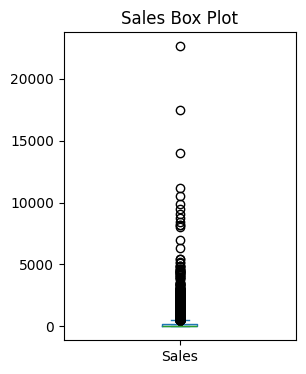

In [47]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers_sales = df[(df['Sales'] < lower_fence) | (df['Sales'] > upper_fence)]

print(f"Jumlah outlier di kolom Sales: {len(outliers_sales)}")

os = df["Sales"].plot(kind='box', figsize=(3, 4))
os.set_title('Sales Box Plot');

Jumlah outlier di kolom Discount: 856


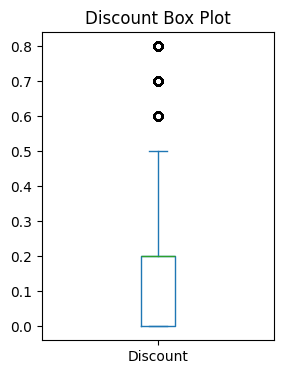

In [48]:
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers_Discount = df[(df['Discount'] < lower_fence) | (df['Discount'] > upper_fence)]

print(f"Jumlah outlier di kolom Discount: {len(outliers_Discount)}")


od = df["Discount"].plot(kind='box', figsize=(3, 4))
od.set_title('Discount Box Plot');

Jumlah outlier di kolom profit: 1881


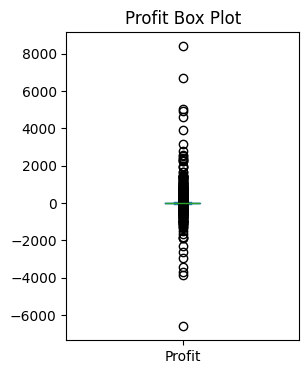

In [49]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers_profit = df[(df['Profit'] < lower_fence) | (df['Profit'] > upper_fence)]

print(f"Jumlah outlier di kolom profit: {len(outliers_profit)}")


op = df["Profit"].plot(kind='box', figsize=(3, 4))
op.set_title('Profit Box Plot');

Pengecekan outlier dilakukan pada kolom ``Sales``, ``Discount``, dan ``Profit`` menggunakan metode Interquartile Range (IQR).
Outlier didefinisikan sebagai nilai yang berada di luar rentang [Q1 - 1,5 × IQR, Q3 + 1,5 × IQR].

**Sales**: terdapat 1.167 data outlier.<br>
**Discount**: terdapat 856 data outlier.<br>
**Profit**: terdapat 1.881 data outlier.<br>

Pengecekan ini bertujuan untuk memahami distribusi data dan mengidentifikasi keberadaan nilai ekstrem.

**Kenapa Tidak Menghapus Outlier?** <br>

Meskipun sejumlah outlier teridentifikasi pada kolom Sales, Discount, dan Profit, pada tahap ini tidak dilakukan penghapusan data outlier. Hal ini dipertimbangkan karena outlier yang ditemukan tetap merepresentasikan kondisi bisnis yang nyata, seperti transaksi bernilai sangat tinggi, diskon besar, atau profit ekstrem, yang mungkin penting untuk dianalisis. Menghapus outlier berisiko menghilangkan informasi berharga dan mengurangi kelengkapan analisis. Oleh karena itu, seluruh data tetap dipertahankan agar analisis dapat mencerminkan kondisi operasional secara lebih menyeluruh dan akurat.

## Penambahan Kolom Baru: ``Profit Margin``, ``Year``, ``Month``, ``YearMonth``, dan ``Profit Status``

In [50]:
df['Profit Margin'] = df['Profit'] / df['Sales'] * 100
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['Profit Status'] = df['Profit'].apply(lambda x: 'Rugi' if x < 0 else 'Untung')


Pada tahap ini, dilakukan penambahan kolom baru ke dalam dataset untuk membantu analisis lebih lanjut. Kolom-kolom tersebut meliputi **Profit Margin**, **Year**, **Month**, **Year Month**, dan **Profit Status**
- **Profit Margin** dihitung dengan rumus `Profit / Sales * 100`, yang merepresentasikan seberapa besar keuntungan yang diperoleh dibandingkan dengan nilai penjualan.
- Kolom **Order Date** dikonversi terlebih dahulu ke dalam format ``datetime`` agar dapat diekstrak informasinya.
- Dari kolom tanggal tersebut, ditambahkan kolom **Year** dan **Month** yang masing-masing merepresentasikan tahun dan bulan dari tanggal pemesanan.
- Kolom **YearMonth** ditambahkan menggunakan metode ``to_period('M')``, yang menggabungkan informasi tahun dan bulang dalam format periode bulanan.
- Terakhir, ditambahkan kolom **Profit Status** yang mengklasifikasikan setiap transaksi ke dalam dua kategori, yaitu Rugi jika nilai profit kurang dari nol, dan untung jika sebaliknya


In [51]:
df.head(5)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,License,Sales,Quantity,Discount,Profit,Profit Margin,Year,Month,YearMonth,Profit Status
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,2022,11,2022-11,Untung
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00,2022,11,2022-11,Untung
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,...,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00,2022,6,2022-06,Untung
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00,2021,10,2021-10,Rugi
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,...,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25,2021,10,2021-10,Untung


## Penyimpanan Data yang Sudah Dibersihkan ke dalam File Excel

In [52]:
df.to_excel('Cleaned SaaS-Sales-Data.xlsx', index=False)

Setelah proses pembersihan dan penambahan kolom baru selesai, dataset disimpan ke dalam file Excel dengan nama "**Cleaned SaaS-Sales-Data.xlsx**" menggunakan fungsi ``to_excel()``.
Penyimpanan ini dilakukan untuk memastikan hasil data yang telah diproses dapat digunakan kembali untuk keperluan analisis lebih lanjut tanpa perlu mengulangi proses pembersihan.

## Data Analysis <br>

Setelah dilakukan **data cleaning dan persiapan data**, langkah pertama dalam eksplorasi ini adalah melakukan **ekspolrasi tergadap distribusi nilai Profit dan Profit Margin** untuk seluruh transaksi di perusahaan AWS.

## Distribusi `Profit` dan `Profit Margin` 

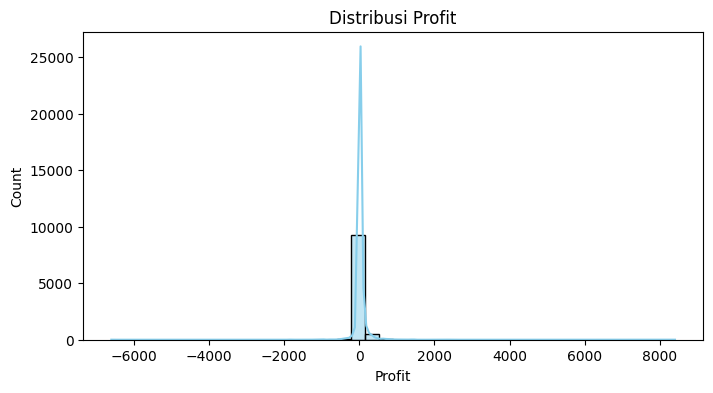

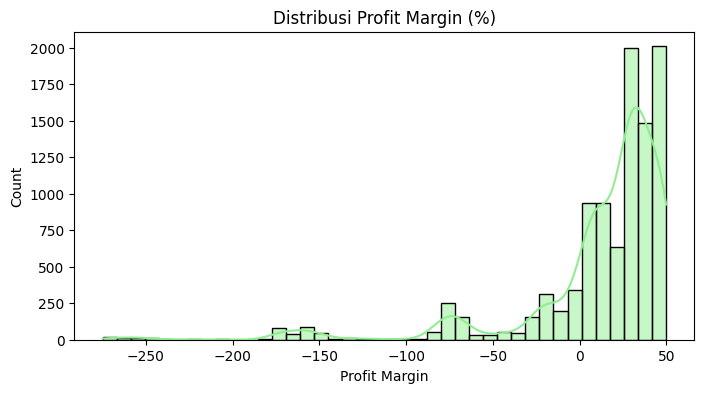

In [53]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Profit'], bins=40, kde=True, color='skyblue')
plt.title("Distribusi Profit")
plt.xlabel("Profit")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Profit Margin'], bins=40, kde=True, color='lightgreen')
plt.title("Distribusi Profit Margin (%)")
plt.xlabel("Profit Margin")
plt.show()

Pada grafik distribusi Profit, terlihat bahwa **mayoritas transaksi menghasilkan nilai profit yang relatif kecil dan berpusat di sekitar angka nol.** Namun demikian, terdapat **nilai-nilai profit yang sangat ekstrem di sisi negatif maupun positif,** yang masih tetap disertakan dalam analisis untuk menjaga kelengkapan informasi. Adanya transaksi dengan profit negatif dalam jumlah besar menunjukkan potensi kerugian signifikan yang dapat memengaruhi profitabilitas perusahaan secara keseluruhan

Sementara itu, grafik distribusi Profit Margin memperlihatkan bahwa **kebanyakan transaksi berada dalam margin positif antara 0% hingga 50%,** mencerminkan profitabilitas yang wajar. Namun, terdapat pula sejumlah transaksi dengan margin negatif ekstrem, bahkan hingga di bawah -100%, yang mengindikasikan bahwa dalam beberapa kasus, kerugian lebih besar daripada nilai penjualannya.

Kedua distribusi ini memperkuat indikasi awal bahwa **perusahaan tidak hanya menghadapi risiko profit rendah, tetapi juga harus menangani kelompok transaksi yang benar-benar merugikan.** Oleh karena itu, diperlukan analisis lebih mendalam untuk mengidentifikasi segmen, wilayah, produk, serta pola diskon yang berkontribusi terhadap tingginya jumlah transaksi dengan margin negatif tersebut.


## Proporsi Transaksi Rugi vs Untung


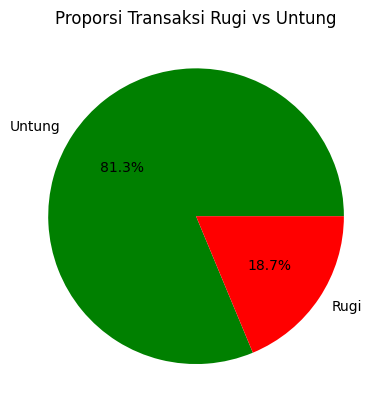

In [54]:
df['Profit Status'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=['green', 'red'])
plt.title("Proporsi Transaksi Rugi vs Untung")
plt.ylabel("")
plt.show()


Setelah memahami distribusi nilai Profit dan Profit Margin, analisis dilanjutkan dengan mengukur proporsi transaksi yang mengalami kerugian dibandingkan dengan transaksi yang menguntungkan.

Berdasarkan visualisasi pie chart, terlihat bahwa sekitar **18,7% dari total transaksi berada dalam kategori rugi, sementara 81,3% sisanya menghasilkan keuntungan.**
Meskipun secara persentase transaksi untung lebih dominan, **porsi transaksi rugi hampir mencapai satu dari setiap lima transaksi.**
Proporsi sebesar ini tidak bisa diabaikan, mengingat bahwa kerugian per transaksi bisa saja bernilai signifikan dan berpotensi memberikan dampak besar terhadap kinerja keuangan perusahaan secara keseluruhan.

Temuan ini menjadi landasan penting untuk melanjutkan investigasi lebih dalam:
- Siapa (segmen pelanggan) yang paling banyak mengalami kerugian?
- Di mana (region/city) kerugian paling sering terjadi?
- Produk apa yang paling banyak menyebabkan kerugian?
- Faktor apa yang mungkin mendorong tingginya kerugian, seperti diskon agresif?

Dengan pemahaman proporsi ini, analisis dapat diarahkan lebih tajam untuk mengidentifikasi sumber utama kerugian dan menyusun strategi perbaikan bisnis.

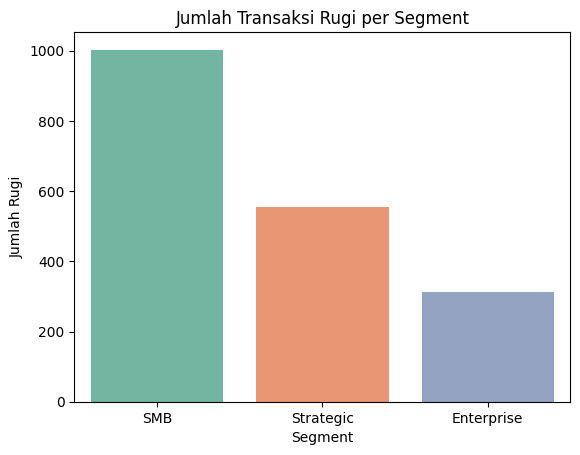

In [55]:
rugi_segment = df[df['Profit'] < 0]['Segment'].value_counts()
sns.barplot(x=rugi_segment.index, y=rugi_segment.values, palette='Set2')
plt.title("Jumlah Transaksi Rugi per Segment")
plt.xlabel("Segment")
plt.ylabel("Jumlah Rugi")
plt.show()


Melanjutkan analisis dari proporsi transaksi rugi, langkah selanjutnya adalah untuk menjawab pertanyaan: **Segmen pelanggan mana yang paling banyak mengalami kerugian?**

Berdasarkan visualisasi grafik di atas, dapat dilihat bahwa **segmen SMB (Small and Medium Business) menjadi penyumbang jumlah transaksi rugi terbesar,** jauh lebih tinggi dibandingkan dengan segmen Strategic dan Enterprise. Segmen SMB mencatatkan lebih dari **1.000 transaksi rugi**, sementara segmen Strategic dan Enterprise masing-masing memiliki jumlah kerugian yang lebih rendah.

Temuan ini menunjukkan bahwa **segmen SMB menjadi kontributor utama terhadap total transaksi kerugian** yang dialami perusahaan.
Hasil ini menjadi dasar penting untuk analisis lanjutan, yaitu mengidentifikasi lokasi geografis (region dan city), produk, dan faktor lain yang mungkin berkaitan dengan tingginya kerugian di segmen ini.

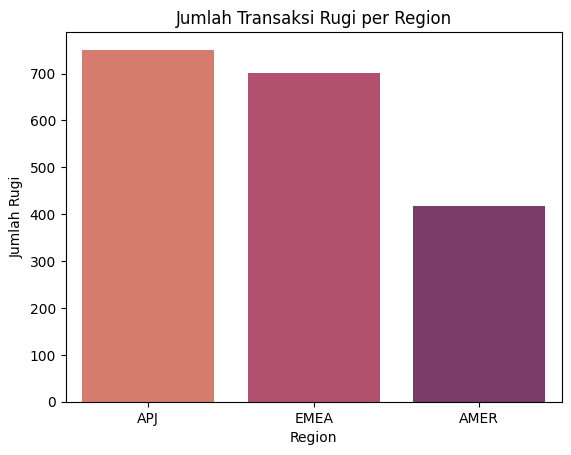

In [ ]:
rugi_region = df[df['Profit'] < 0]['Region'].value_counts()
sns.barplot(x=rugi_region.index, y=rugi_region.values, palette='flare')
plt.title("Jumlah Transaksi Rugi per Region")
plt.xlabel("Region")
plt.ylabel("Jumlah Rugi")
plt.show()


Setelah mengetahui bahwa segmen SMB menjadi penyumbang utama transaksi rugi, langkah analisis dilanjutkan dengan mengidentifikasi **wilayah (region) yang paling banyak mengalami transaksi kerugian.**
Berdasarkan visualisasi grafik di atas, terlihat bahwa **region APJ (Asia Pacific & Japan) mencatatkan jumlah transaksi rugi tertinggi**, diikuti oleh region **EMEA (Europe, Middle East & Africa)**, dan terakhir **AMER (Americas)**.

Region APJ mengalami lebih dari **700 transaksi rugi**, sedangkan EMEA sedikit lebih rendah namun tetap signifikan, dan AMER tercatat memiliki jumlah transaksi rugi yang paling sedikit di antara ketiganya. Temuan ini memberikan arah yang lebih fokus untuk analisis mendalam selanjutnya, yaitu mengidentifikasi kota (City) dalam region yang mengalami kerugian paling besar.
Dengan memahami region mana yang bermasalah, perusahaan dapat lebih mudah menentukan prioritas evaluasi strategi penjualan dan diskon berdasarkan wilayah geografis.

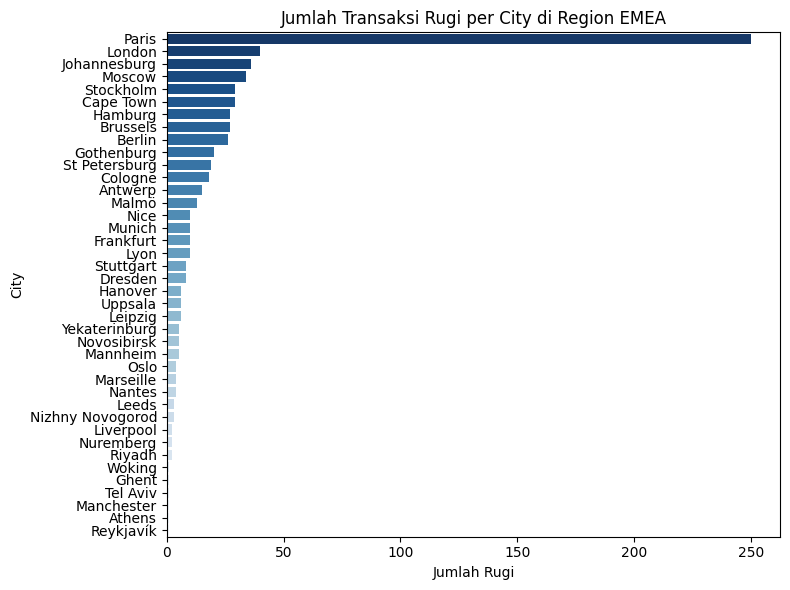

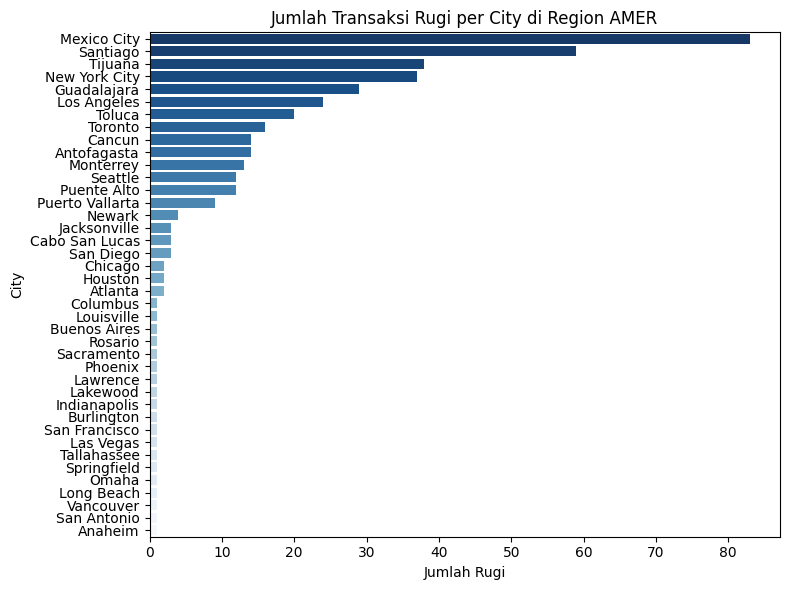

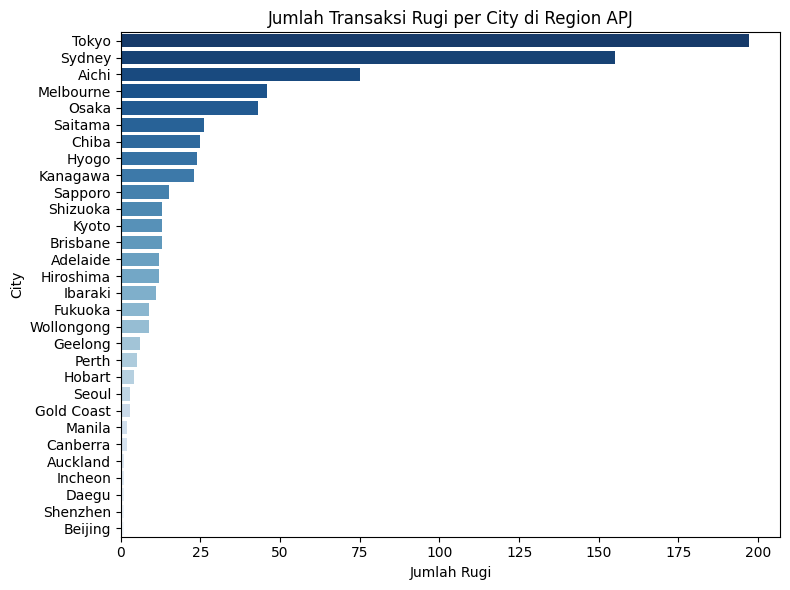

In [ ]:
# Ambil semua nama Region unik
regions = df['Region'].unique()

# Loop tiap region dan tampilkan bar chart per kota
for region in regions:
    df_rugi_region = df[(df['Region'] == region) & (df['Profit'] < 0)]
    rugi_city = df_rugi_region['City'].value_counts()

    if not rugi_city.empty:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=rugi_city.values, y=rugi_city.index, palette='Blues_r')
        plt.title(f"Jumlah Transaksi Rugi per City di Region {region}")
        plt.xlabel("Jumlah Rugi")
        plt.ylabel("City")
        plt.tight_layout()
        plt.show()


Setelah mengetahui bahwa region APJ dan EMEA menjadi penyumbang terbesar dalam transaksi rugi, analisis dilanjutkan ke tingkat yang lebih rinci, yaitu identifikasi kota (City) penyumbang kerugian terbesar dalam masing-masing region.

Pada region **EMEA**, terlihat bahwa **Paris menjadi kota dengan jumlah transaksi rugi tertinggi**, jauh meninggalkan kota-kota lain seperti London dan Johannesburg.
Paris sendiri mencatatkan lebih dari **250 transaksi rugi**, menjadikannya fokus utama untuk analisis lanjutan terkait penyebab tingginya kerugian di kota ini. Di region **AMER**, **Mexico City** muncul sebagai kota dengan jumlah transaksi rugi terbesar, diikuti oleh Santiago dan Tijuana. Meskipun skala transaksinya lebih kecil dibandingkan Paris di EMEA, Mexico City menunjukkan konsistensi sebagai pusat kerugian di wilayah Amerika.

Sedangkan di region **APJ**, **Tokyo** menjadi kontributor utama dengan jumlah transaksi rugi paling banyak, disusul oleh Sydney dan Aichi. Tokyo mencatatkan hampir 200 transaksi rugi, menunjukkan bahwa pasar di kota ini juga menghadapi tantangan profitabilitas yang signifikan. Hasil analisis ini sangat penting karena memperjelas di mana lokasi geografis prioritas yang perlu dianalisis lebih dalam terkait segmen pelanggan, produk yang dijual, serta strategi diskon yang diterapkan.



In [ ]:
# Pilih kota dan region
city = 'Paris'
region = 'EMEA'

# Filter data hanya untuk transaksi rugi di kota dan region tersebut
df_city_rugi = df[(df['City'] == city) & 
                  (df['Region'] == region) & 
                  (df['Profit'] < 0)]

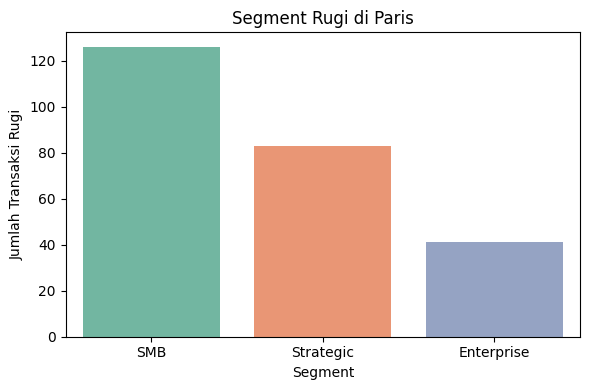

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_city_rugi, x='Segment', palette='Set2')
plt.title(f"Segment Rugi di {city}")
plt.xlabel("Segment")
plt.ylabel("Jumlah Transaksi Rugi")
plt.tight_layout()
plt.show()


Setelah mengetahui bahwa Paris merupakan kota dengan jumlah transaksi rugi tertinggi di region EMEA, analisis kemudian difokuskan untuk mengidentifikasi **segmen pelanggan mana yang paling banyak mengalami kerugian di kota Paris**.

Berdasarkan visualisasi di atas, terlihat bahwa **segmen SMB (Small and Medium Business)** menjadi penyumbang jumlah transaksi rugi terbesar di Paris, disusul oleh segmen Strategic dan Enterprise. Segmen SMB mencatatkan lebih dari 120 transaksi rugi, sementara segmen Strategic mencatatkan sekitar 80 transaksi rugi, dan Enterprise sekitar 40 transaksi rugi.

Hasil ini konsisten dengan temuan sebelumnya di tingkat global, di mana segmen SMB memang menjadi kontributor utama kerugian.
Temuan ini mempertegas bahwa fokus analisis dan perbaikan strategi bisnis di kota Paris harus diarahkan terlebih dahulu kepada segmen SMB, baik dari sisi jenis produk yang ditawarkan, skema pemberian diskon, maupun pendekatan pemasaran yang digunakan. Langkah analisis selanjutnya adalah melihat produk apa saja yang paling banyak menyebabkan kerugian di Paris, untuk semakin memperjelas penyebab tingginya transaksi rugi di segmen ini.

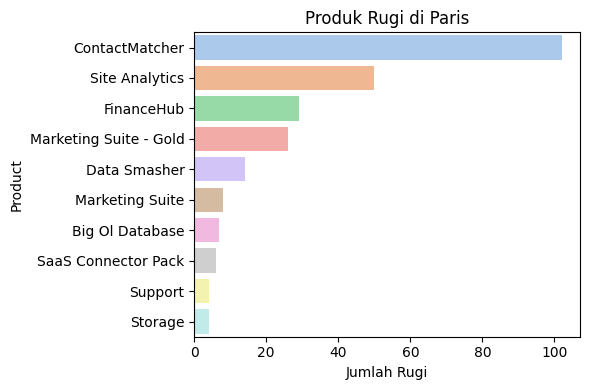

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_city_rugi, y='Product', palette='pastel', order=df_city_rugi['Product'].value_counts().index)
plt.title(f"Produk Rugi di {city}")
plt.xlabel("Jumlah Rugi")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


Berdasarkan visualisasi diatas, dapat dilihat bahwa produk **ContactMatcher menjadi penyumbang transaksi rugi terbesar di Paris**, dengan selisih yang cukup jauh dibandingkan produk lainnya. Posisi kedua ditempati oleh Site Analytics, diikuti oleh produk FinanceHub dan Marketing Suite – Gold.
Sementara itu, produk-produk lain seperti Data Smasher, Marketing Suite, Big Ol Database, SaaS Connector Pack, Support, dan Storage mencatatkan jumlah transaksi rugi yang lebih kecil.

Temuan ini menunjukkan bahwa kerugian di Paris terkonsentrasi pada beberapa produk utama, dengan ContactMatcher sebagai produk yang perlu menjadi prioritas utama untuk ditinjau lebih lanjut. Evaluasi terhadap produk-produk ini penting dilakukan, baik dari sisi strategi harga, efektivitas program diskon, maupun kecocokan produk terhadap kebutuhan pelanggan di segmen SMB yang mendominasi kerugian di Paris. Analisis berikutnya akan melanjutkan dengan melihat pola waktu kerugian melalui tren bulanan transaksi rugi di Paris, serta memeriksa rata-rata diskon bulanan yang diberikan untuk transaksi rugi di kota ini, guna memahami lebih jauh faktor-faktor penyebab utama terjadinya kerugian.

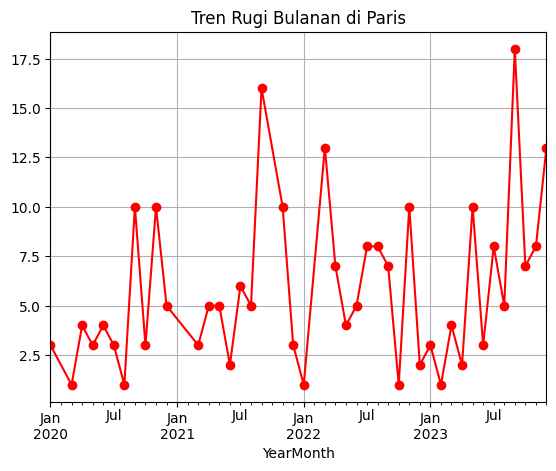

In [ ]:
# Tren waktu
df_city_rugi.groupby('YearMonth')['Profit'].count().plot(marker='o', color='red')
plt.title("Tren Rugi Bulanan di Paris")
plt.grid(True)
plt.show()


Setelah mengetahui produk-produk yang paling banyak berkontribusi terhadap kerugian di Paris, analisis dilanjutkan dengan melihat pola waktu terjadinya transaksi rugi. Tujuannya adalah untuk memahami kapan periode peningkatan kerugian terjadi, sehingga perusahaan dapat lebih proaktif dalam mengantisipasi risiko di masa depan.

Berdasarkan visualisasi tren bulanan di atas, dapat dilihat bahwa **jumlah transaksi rugi di Paris mengalami fluktuasi sepanjang periode 2020 hingga 2023.**
Terdapat beberapa lonjakan signifikan yang terjadi pada periode tertentu, salah satunya pada akhir tahun 2021 dan kembali meningkat pada akhir tahun 2023. Secara umum, kuartal keempat (Q4) setiap tahun, terutama di bulan November hingga Desember, menunjukkan kecenderungan terjadinya peningkatan jumlah transaksi rugi.
Fenomena ini konsisten dengan pola musiman yang sering kali terkait dengan periode promosi besar atau program diskon akhir tahun.

Temuan ini memberikan indikasi bahwa periode akhir tahun merupakan periode risiko tinggi terhadap peningkatan kerugian, yang memerlukan perhatian khusus dalam strategi penjualan, diskon, dan pengelolaan margin. Langkah selanjutnya adalah kita akan memeriksa rata-rata diskon bulanan pada transaksi rugi di Paris, untuk menguji apakah terdapat hubungan antara lonjakan kerugian dan pemberian diskon besar di periode tersebut

In [ ]:
avg_discount = df_city_rugi['Discount'].mean()
print(f"Rata-rata diskon pada transaksi rugi di {city}: {avg_discount:.2%}")


Rata-rata diskon pada transaksi rugi di Paris: 46.12%


Untuk melengkapi pemahaman terhadap penyebab kerugian di Paris, dilakukan analisis terhadap rata-rata diskon yang diberikan pada transaksi yang mengalami kerugian Hasil perhitungan menunjukkan bahwa **rata-rata diskon pada transaksi rugi di Paris mencapai 46,12%.** Angka ini cukup tinggi, mengingat bahwa diskon mendekati setengah dari nilai penjualan dapat secara signifikan berdampak terhadap penurunan profit margin.

Temuan ini menguatkan dugaan bahwa tingginya tingkat diskon merupakan salah satu faktor yang berkontribusi terhadap terjadinya kerugian, terutama ketika dikombinasikan dengan tren peningkatan jumlah transaksi rugi pada periode tertentu seperti akhir tahun. Dengan demikian, analisis ini menyoroti pentingnya **mengelola pemberian diskon** secara hati-hati, khususnya pada periode musiman yang sudah teridentifikasi sebagai periode dengan risiko kerugian lebih tinggi.

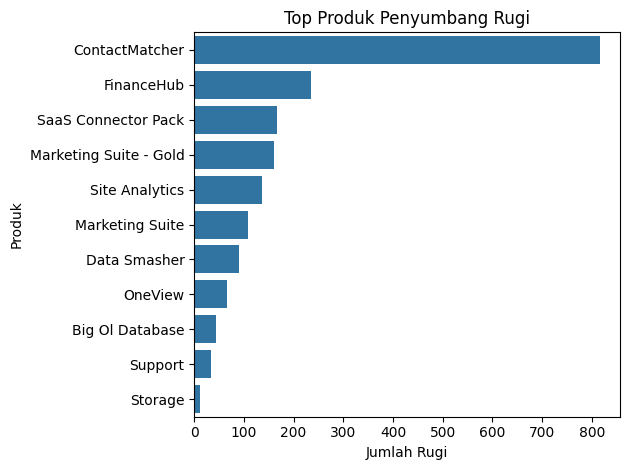

In [ ]:
produk_rugi = df[df['Profit'] < 0]['Product'].value_counts()
sns.barplot(x=produk_rugi.values, y=produk_rugi.index)
plt.title("Top Produk Penyumbang Rugi")
plt.xlabel("Jumlah Rugi")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()


Setelah menganalisis kerugian berdasarkan segmentasi pelanggan dan wilayah geografis, analisis dilanjutkan dengan mengidentifikasi produk-produk yang paling banyak berkontribusi terhadap transaksi rugi secara keseluruhan. Berdasarkan visualisasi di atas, dapat dilihat bahwa produk **ContactMatcher** menjadi penyumbang transaksi rugi terbanyak, dengan jumlah yang jauh lebih besar dibandingkan produk-produk lainnya.

Diikuti oleh FinanceHub dan SaaS Connector Pack yang masing-masing juga mencatatkan kontribusi signifikan terhadap kerugian.
Produk-produk lain seperti Marketing Suite – Gold, Site Analytics, dan Marketing Suite menempati urutan selanjutnya, meskipun jumlah transaksinya lebih rendah Produk seperti Data Smasher, OneView, Big Ol Database, Support, dan Storage juga tercatat mengalami kerugian, namun dalam jumlah yang relatif kecil dibandingkan dengan produk utama di urutan atas. Temuan ini mengindikasikan bahwa kerugian perusahaan **secara keseluruhan sangat terkonsentrasi pada beberapa produk utama, terutama ContactMatcher.**

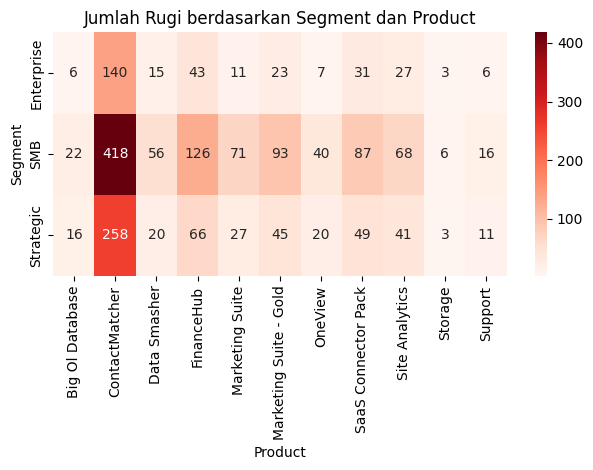

In [ ]:
pivot = df[df['Profit'] < 0].pivot_table(index='Segment', columns='Product', values='Profit', aggfunc='count').fillna(0)
sns.heatmap(pivot, annot=True, cmap='Reds', fmt='.0f')
plt.title("Jumlah Rugi berdasarkan Segment dan Product")
plt.tight_layout()
plt.show()


Untuk memperdalam pemahaman mengenai sumber utama kerugian, dilakukan analisis kombinasi **segmen pelanggan dan produk** pada transaksi rugi. Berdasarkan hasil heatmap, terdapat beberapa temuan utama:
- **ContactMatcher** menjadi produk penyumbang transaksi rugi terbanyak di seluruh segmen, dengan dominasi paling kuat pada **segmen SMB** (418 transaksi rugi).
- Produk lain seperti **FinanceHub, SaaS Connector Pack, dan Marketing Suite – Gold** juga menunjukkan kontribusi kerugian, terutama pada segmen SMB.
- **Segmen Strategic dan Enterprise** juga menunjukkan pola serupa, dengan ContactMatcher tetap mendominasi, meskipun jumlah transaksinya lebih rendah dibandingkan SMB.

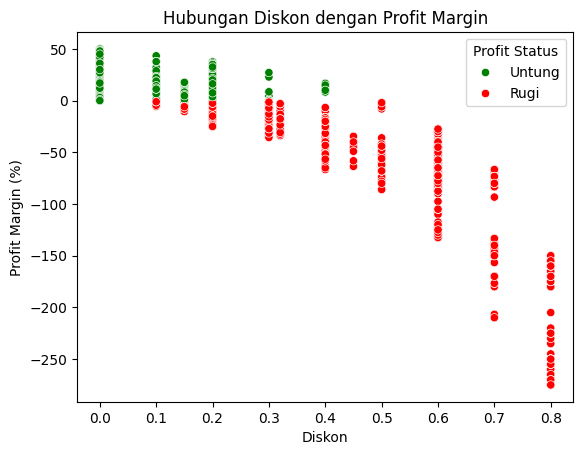

In [ ]:
sns.scatterplot(data=df, x='Discount', y='Profit Margin', hue='Profit Status', palette={'Rugi':'red', 'Untung':'green'})
plt.title("Hubungan Diskon dengan Profit Margin")
plt.xlabel("Diskon")
plt.ylabel("Profit Margin (%)")
plt.show()

Berdasarkan scatterplot di atas, terlihat bahwa **terdapat korelasi negatif antara tingkat diskon dan profit margin.** Semakin tinggi tingkat diskon yang diberikan, semakin rendah nilai profit margin yang dihasilkan. Bahkan, pada diskon di atas 30%, mulai banyak transaksi yang menunjukkan profit margin negatif, dengan tren yang semakin tajam menurun seiring peningkatan diskon.

Data ini juga menunjukkan bahwa:
- **Pada diskon rendah (di bawah 20%),** sebagian besar transaksi masih berada di area profit margin positif (ditandai warna hijau — Untung).
- Namun, saat diskon meningkat, terutama **di atas 40% hingga 80%,** hampir seluruh transaksi berpindah ke wilayah **profit margin negatif** (ditandai warna merah — Rugi).

Temuan ini mempertegas bahwa **tingkat diskon yang terlalu tinggi berkaitan erat dengan peningkatan risiko kerugian,** karena margin keuntungan tidak mampu lagi menutupi besarnya potongan harga yang diberikan. Dengan pola ini, penting bagi perusahaan untuk mempertimbangkan pengendalian atas batas maksimal diskon yang ditawarkan, terutama pada produk dan segmen yang sudah teridentifikasi rawan mengalami kerugian.

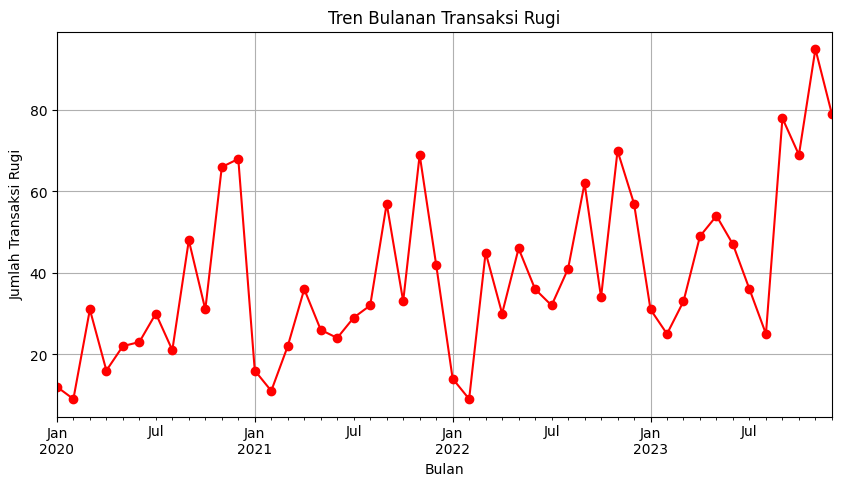

In [ ]:
rugi_tren = df[df['Profit'] < 0].groupby('YearMonth')['Profit'].count()

plt.figure(figsize=(10, 5))
rugi_tren.plot(marker='o', color='red')
plt.title("Tren Bulanan Transaksi Rugi")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi Rugi")
plt.grid(True)
plt.show()


Untuk memahami pola waktu terjadinya kerugian secara keseluruhan, dilakukan analisis terhadap tren jumlah transaksi rugi per bulan dari tahun 2020 hingga 2023. Berdasarkan grafik tren di atas, terlihat bahwa **jumlah transaksi rugi menunjukkan pola fluktuatif namun cenderung meningkat dari waktu ke waktu.**

Beberapa puncak kenaikan jumlah kerugian tercatat, terutama:

- **Pada akhir tahun 2020,**

- **Akhir tahun 2021,**

- **Akhir tahun 2023.**

Pola ini menunjukkan bahwa periode **kuartal keempat (Q4),** khususnya bulan **November hingga Desember,** merupakan waktu di mana transaksi rugi sering mengalami peningkatan. **Lonjakan kerugian di akhir tahun ini kemungkinan berkaitan dengan siklus promosi musiman,** seperti program diskon besar-besaran yang biasanya lebih intensif pada periode tersebut. Selain itu, tren umum dari pertengahan tahun 2022 hingga 2023 menunjukkan tingkat transaksi rugi yang relatif lebih tinggi dibandingkan periode sebelumnya, mengindikasikan adanya peningkatan risiko kerugian dalam skala lebih luas yang perlu menjadi perhatian.

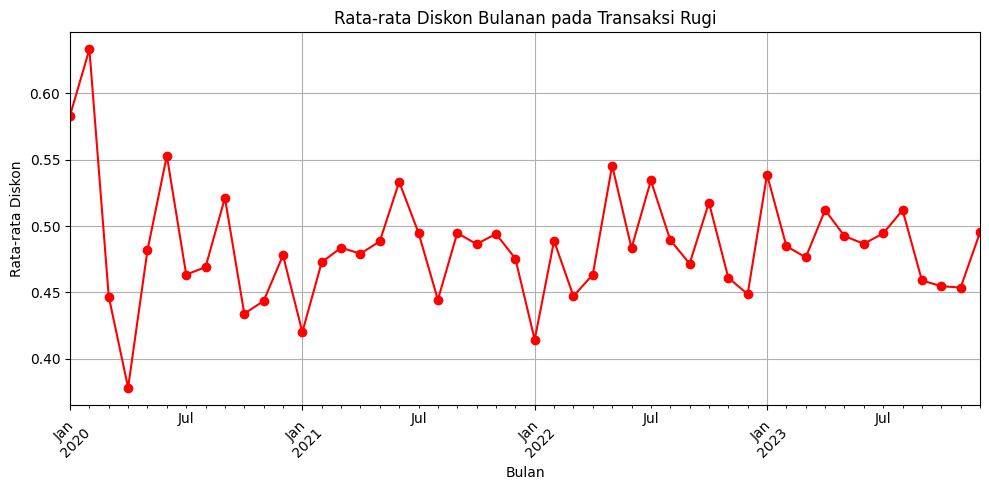

In [ ]:
# Filter transaksi rugi
df_rugi = df[df['Profit'] < 0]

# Hitung rata-rata diskon per bulan pada transaksi rugi
avg_discount_rugi = df_rugi.groupby('YearMonth')['Discount'].mean()

# Plot
plt.figure(figsize=(10, 5))
avg_discount_rugi.plot(marker='o', color='red')
plt.title("Rata-rata Diskon Bulanan pada Transaksi Rugi")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Diskon")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa **rata-rata diskon pada transaksi rugi secara umum stabil di kisaran 45% hingga 55%** sepanjang tahun 2020 hingga 2023. Meskipun terdapat fluktuasi kecil dari bulan ke bulan, pola besarnya menunjukkan bahwa tingkat diskon yang relatif tinggi ini konsisten diberikan dalam jangka panjang.

Beberapa puncak kenaikan diskon terlihat terjadi di awal tahun 2020, pertengahan 2021, serta beberapa bulan di tahun 2022 dan 2023. Namun demikian, meskipun diskon sesekali meningkat, rata-rata diskon tetap berada dalam rentang yang cukup tinggi hampir sepanjang waktu. Kondisi ini memperkuat temuan sebelumnya bahwa **tingkat diskon yang tinggi telah menjadi faktor yang secara konsisten berkontribusi terhadap margin negatif,** terutama jika tidak diiringi dengan strategi harga yang tepat atau pengelolaan promosi yang lebih hati-hati.

In [ ]:
df[df['Profit'] < 0].groupby('Segment')['Discount'].mean()


Segment
Enterprise    0.483910
SMB           0.475334
Strategic     0.489209
Name: Discount, dtype: float64

Perhitungan rata-rata diskon untuk transaksi rugi dilakukan untuk masing-masing segmen pelanggan.

Hasil analisis menunjukkan:

- Segmen **Enterprise** memiliki rata-rata diskon sebesar 48.39%.

- Segmen **Strategic** memiliki rata-rata diskon sebesar 48.20%.

- Segmen **SMB** memiliki rata-rata diskon sebesar 47.53%.

Ketiga segmen tersebut menunjukkan bahwa tingkat diskon yang diberikan dalam transaksi rugi relatif tinggi dan tidak jauh berbeda satu sama lain. Hal ini mengindikasikan bahwa tingginya pemberian diskon bukan hanya terjadi di satu segmen, melainkan merata di seluruh segmen pelanggan.

In [ ]:
df[df['Profit'] < 0].groupby('Product')['Discount'].mean()

Product
Big Ol Database           0.581818
ContactMatcher            0.645282
Data Smasher              0.200000
FinanceHub                0.261277
Marketing Suite           0.348532
Marketing Suite - Gold    0.200000
OneView                   0.800000
SaaS Connector Pack       0.530539
Site Analytics            0.342647
Storage                   0.200000
Support                   0.200000
Name: Discount, dtype: float64

Analisis dilanjutkan untuk mengevaluasi rata-rata diskon yang diberikan pada setiap produk dalam transaksi yang mengalami kerugian.

Berdasarkan hasil perhitungan:

- Produk **OneView** menunjukkan rata-rata diskon tertinggi sebesar **80.00%**, secara signifikan lebih tinggi dibandingkan produk lainnya.

- Produk **ContactMatcher** memiliki rata-rata diskon sebesar **64.53%**, diikuti oleh Big Ol Database (58.18%) dan SaaS Connector Pack (53.06%).

- Produk-produk lain seperti FinanceHub (26.13%), Marketing Suite (34.35%), dan Site Analytics (34.26%) menunjukkan tingkat diskon yang lebih moderat.

- Beberapa produk seperti **Data Smasher, Marketing Suite - Gold, Storage, dan Support** memiliki rata-rata diskon yang lebih rendah, sekitar 20.00%.

Meskipun produk **OneView** mencatatkan tingkat diskon yang sangat tinggi, kontribusinya terhadap jumlah transaksi rugi tidak sebesar produk seperti **ContactMatcher**.

## Uji Hipotesis Hubungan antara Diskon dan Profit Margin
Untuk menguji apakah terdapat hubungan antara tingkat diskon dengan profit margin, dilakukan uji korelasi menggunakan metode Spearman Rank Correlation.

In [ ]:
from scipy.stats import spearmanr

corr, p_val = spearmanr(df['Discount'], df['Profit Margin'])

print("Spearman Correlation:", round(corr, 3), "| P-Value:", round(p_val, 4))

alpha = 0.05
if p_val < alpha:
    print("Karena p-value <", alpha, ", maka tolak H0.")
    print("Kesimpulan: Terdapat hubungan signifikan antara diskon dan profit margin.")
    if corr < 0:
        print("Arah hubungan: Negatif → semakin besar diskon, semakin rendah profit margin.")
    else:
        print("Arah hubungan: Positif.")
else:
    print("Karena p-value >", alpha, ", maka gagal tolak H0.")
    print("Kesimpulan: Tidak terdapat hubungan signifikan antara diskon dan profit margin.")


Spearman Correlation: -0.645 | P-Value: 0.0
Karena p-value < 0.05 , maka tolak H0.
Kesimpulan: Terdapat hubungan signifikan antara diskon dan profit margin.
Arah hubungan: Negatif → semakin besar diskon, semakin rendah profit margin.


Hasil uji hipotesis menunjukkan bahwa:

- Nilai koefisien **korelasi Spearman sebesar -0.645.**

- Nilai **p-value sebesar 0.0**

Temuan ini memperkuat hasil eksplorasi sebelumnya, di mana tingkat diskon yang tinggi terindikasi berkorelasi dengan penurunan profitabilitas transaksi.
Hal ini menjadi dasar penting untuk mempertimbangkan kembali kebijakan pemberian diskon, khususnya untuk produk atau segmen pelanggan yang rentan terhadap kerugian.

## Kesimpulan dan Rekomendasi

Berdasarkan hasil eksplorasi data dan analisis yang telah dilakukan, berikut ini merukan kesimpulan dan rekomendasi:
1. Distribusi Profit dan Profit Margin <br>
Hasil eksplorasi data menunjukkan bahwa sekitar **18,7%** dari total transaksi mengalami kerugian.
Meskipun bukan mayoritas, persentase ini cukup signifikan untuk menjadi perhatian, karena berpotensi menggerus profitabilitas perusahaan apabila tidak segera dikendalikan.

2. Segmentasi dan Regional Kerugian <br>
- **Segmen SMB** (Small and Medium Business) menjadi penyumbang terbesar terhadap jumlah transaksi rugi.
- Dari sisi wilayah, **Region APJ** dan **Region EMEA** menunjukkan tingkat kerugian yang lebih tinggi dibandingkan dengan **Region AMER**.
- Di dalam Region EMEA, **kota Paris** tercatat sebagai kota dengan jumlah transaksi rugi terbanyak. <br><br>
Tingginya jumlah transaksi rugi di Paris diduga disebabkan oleh beberapa faktor, salah satunya adalah tingginya tingkat adopsi teknologi dan layanan SaaS. Sebagai salah satu pusat ekonomi dan teknologi terbesar di Eropa, Paris memiliki ribuan perusahaan kecil hingga menengah yang aktif menggunakan berbagai layanan berbasis SaaS. Tingginya penggunaan produk ini secara alami menyebabkan volume transaksi yang tinggi. Ketika dikombinasikan dengan strategi diskon besar untuk menarik dan mempertahankan pelanggan di pasar yang sangat kompetitif, jumlah transaksi yang mengalami kerugian pun ikut meningkat secara signifikan.

3. Produk Penyumbang Kerugian <br>
- **ContactMatcher** menjadi kontributor utama terhadap jumlah transaksi rugi, baik di Paris maupun secara global.
- Produk lain seperti **Big Ol Database** dan **SaaS Connector Pack** juga mencatatkan kontribusi kerugian yang cukup signifikan.
- Produk OneView, meskipun memiliki rata-rata diskon yang sangat tinggi (sekitar 80%), tercatat memiliki volume transaksi rugi yang relatif kecil dibandingkan produk lain.

4. Tren Waktu Terjadinya Kerugian <br>
Analisis tren bulanan menunjukkan adanya lonjakan jumlah transaksi rugi pada akhir tahun, khususnya pada bulan **November hingga Desember**.
Pola ini konsisten terjadi dari tahun 2020 hingga 2023, mengindikasikan bahwa program promosi musiman seperti diskon akhir tahun berkontribusi terhadap peningkatan jumlah transaksi rugi.

5. Analisis Diskon <br>
Rata-rata tingkat diskon pada transaksi rugi stabil tinggi sepanjang tahun, berkisar antara 45% hingga 55%. Diskon besar ini tidak hanya terjadi pada periode musiman, tetapi merata sepanjang tahun di semua segmen pelanggan.

6. Hubungan Diskon dan Profit Margin
- Terdapat hubungan signifikan antara tingkat diskon dan profit margin (ρ = -0.645, p-value = 0.0000).
- Hubungan tersebut bersifat negatif, yang berarti semakin besar diskon yang diberikan, semakin rendah profit margin yang dihasilkan.

Temuan ini memperkuat dugaan bahwa diskon besar secara konsisten berdampak negatif terhadap profitabilitas perusahaan.





**Rekomendasi**

1. Evaluasi dan Pembatasan Strategi Diskon <br>
Tinjau ulang dan batasi tingkat maksimum diskon yang diberikan, khususnya untuk produk-produk penyumbang kerugian seperti ContactMatcher, Big Ol Database, dan SaaS Connector Pack. Pertimbangkan untuk menerapkan kebijakan diskon bertingkat yang disesuaikan berdasarkan segmen pelanggan dan kinerja masing-masing produk.
Contoh Sederhananya: <br>
- Misalnya harga jual normal sebuah produk adalah $100.
- Dengan diskon 50%, harga jual turun menjadi $50.
- Jika biaya pokok (cost) produk tersebut adalah $40, maka margin yang diperoleh hanya:
    - Margin = (50 - 40) / 50 = 20%.
- Jika diskon dikurangi menjadi 30%, maka harga jual menjadi $70:
    - Margin = (70 - 40) / 70 ≈ 42,9%.

    Artinya, pengurangan diskon sebesar 20% dapat melipatgandakan margin profit dari 20% menjadi hampir 43%. Pengaturan diskon yang lebih ketat dapat meningkatkan profitabilitas tanpa harus menghilangkan program promosi sepenuhnya.

2. Prioritaskan Produk dan Segmen Rawan <br>
Fokuskan upaya perbaikan pada produk dan segmen yang memberikan kontribusi terbesar terhadap kerugian, khususnya pada segmen SMB. Strategi yang dapat dilakukan antara lain:
- Meninjau kembali skema harga dan pemberian diskon.
- Menambah nilai layanan produk agar tidak terlalu bergantung pada diskon untuk menarik pelanggan.
- Meningkatkan monitoring terhadap perilaku pelanggan di segmen ini.

3. Pengawasan Ketat Selama Periode Promosi Musimisan <br>
Tingkatkan pengawasan terhadap program promosi di bulan *November hingga Desember*, periode di mana lonjakan transaksi rugi terjadi.
Pastikan bahwa setiap program diskon musiman tetap dikendalikan dengan batasan margin minimum. Selain itu, lakukan evaluasi performa program promosi secara real-time untuk mencegah lonjakan kerugian di akhir tahun.